In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
def read_cancer(filename):
    df = pd.read_csv(filename, na_values=["?"])

    # Drop Missing Values
    missing_val_index = df.apply(lambda row: row.isna().any(), axis=1)
    df = df[~missing_val_index]

    # Reformat Target labels to 0 (benign) and 1 (malignant)
    df.cancer.replace({2: 0, 4: 1}, inplace=True)

    return df


cancer = read_cancer("../data/breast_cancer_wisconsin.csv")

<IPython.core.display.Javascript object>

In [3]:
cancer.head()

,sample_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,mitoses,cancer
1000025,5,1,1,1,2,1.0,3,1,1,0
1002945,5,4,4,5,7,10.0,3,2,1,0
1015425,3,1,1,1,2,2.0,3,1,1,0
1016277,6,8,8,1,3,4.0,3,7,1,0
1017023,4,1,1,3,2,1.0,3,1,1,0


<IPython.core.display.Javascript object>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.iloc[:, 1:9], cancer.cancer, test_size=0.33, random_state=42
)

<IPython.core.display.Javascript object>

In [5]:
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

<IPython.core.display.Javascript object>

In [6]:
y_proba_pred = clf.predict_proba(X_test)[:, 1]

<IPython.core.display.Javascript object>

In [11]:
test_set_preds = pd.concat(
    [pd.Series(y_proba_pred), y_test.reset_index(drop=True)], axis=1
)
test_set_preds.columns = ["predicted_probability", "actual"]
test_set_preds.reset_index(inplace=True)
test_set_preds.sort_values("predicted_probability", inplace=True)
test_set_preds["prob_rank"] = range(len(test_set_preds))
test_set_preds.head()

,index,predicted_probability,actual,prob_rank
220,220,0.003607,0,0
40,40,0.004092,0,1
167,167,0.004092,0,2
34,34,0.004092,0,3
216,216,0.004873,0,4


<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='prob_rank', ylabel='predicted_probability'>

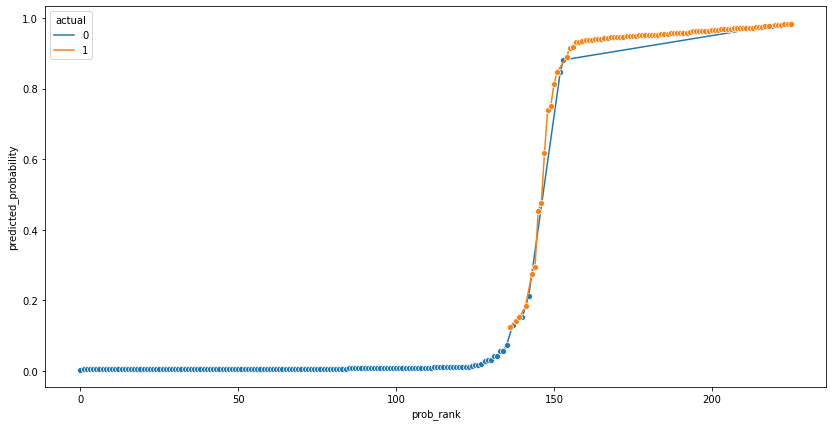

<IPython.core.display.Javascript object>

In [16]:
plt.rcParams["figure.figsize"] = (14, 7)
sns.lineplot(
    data=test_set_preds,
    x="prob_rank",
    y="predicted_probability",
    marker="o",
    hue="actual",
)

In [17]:
fpr, tpr, thresholds = roc_curve(
    test_set_preds.actual, test_set_preds.predicted_probability
)

<IPython.core.display.Javascript object>

In [19]:
plot_df = pd.concat([pd.Series(tpr), pd.Series(fpr), pd.Series(thresholds)], axis=1)
plot_df.columns = ["tpr", "fpr", "threshold"]
plot_df = plot_df[~(plot_df.threshold == plot_df.threshold.max())]

<IPython.core.display.Javascript object>

In [26]:
plot_df.head()

,tpr,fpr,threshold
1,0.023810,0.000000,0.983928
2,0.071429,0.000000,0.979110
3,0.071429,0.007042,0.977900
4,0.845238,0.007042,0.889862
5,0.845238,0.021127,0.847068


<IPython.core.display.Javascript object>

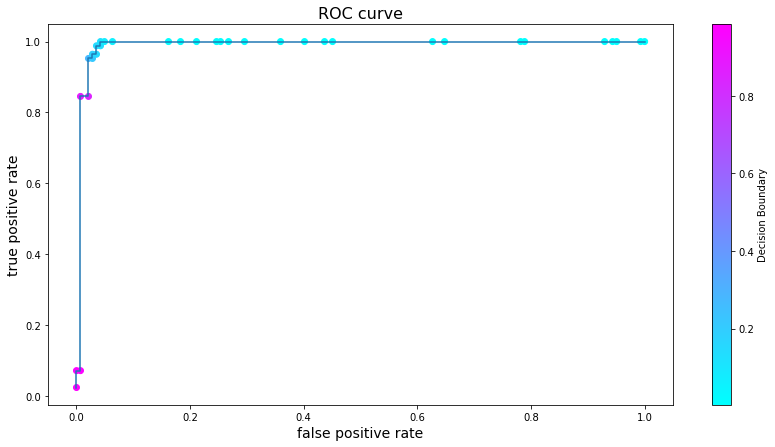

<IPython.core.display.Javascript object>

In [60]:
# ROC curve 
# Decision(p) = 1 if p >= threshold
#             = 0 if p <  threshold
fig, ax = plt.subplots()
point_p = plt.scatter(x=plot_df.fpr, y=plot_df.tpr, c=plot_df.threshold, cmap="cool")
line_p = ax.plot(plot_df.fpr, plot_df.tpr)
cbar = plt.colorbar(label="Decision Boundary", orientation="vertical")
ax.set_xlabel("false positive rate", fontsize=14)
ax.set_ylabel("true positive rate", fontsize=14)
ax.set_title("ROC curve", fontsize=16)
plt.show()

Text(0.5, 0, 'Decision Boundary')

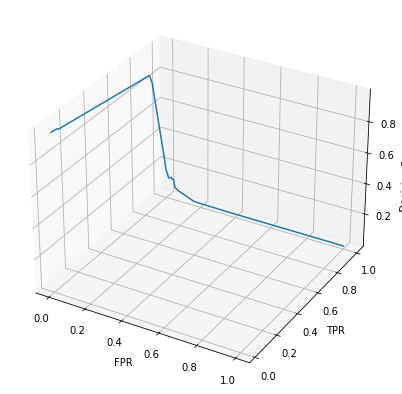

<IPython.core.display.Javascript object>

In [68]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

g = ax.plot3D(
    plot_df.fpr,
    plot_df.tpr,
    plot_df.threshold,
    # c=plot_df.threshold.to_numpy(),
    # cmap="Greens",
)

ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_zlabel("Decision Boundary")

# # Data for three-dimensional scattered points
# zdata = 15 * np.random.random(100)
# xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
# ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');